In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [2]:
df = pd.read_csv("F:\PYTHAN\PYTHAN\iNeuron\ML\CampusX\Linear_Regression\Simple_linear\data.csv")

In [3]:
df.head()

,feature1,feature2,feature3,target
0,-0.570563,1.420342,0.495580,-9.763182
1,-0.990563,0.556965,1.045064,-24.029355
2,-0.674728,0.150617,1.774645,45.616421
3,0.388250,-0.387127,-0.110229,34.135737
4,1.167882,-0.024104,0.145063,86.663647


In [6]:
x = df.iloc[:,0:3]
y = df.iloc[:,-1]

In [7]:
x.head(2)

,feature1,feature2,feature3
0,-0.570563,1.420342,0.495580
1,-0.990563,0.556965,1.045064


In [8]:
y.head(2)

0    -9.763182
1   -24.029355
Name: target, dtype: float64

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

In [10]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(140, 3) (60, 3)
(140,) (60,)


In [11]:
lr = LinearRegression()

In [12]:
lr.fit(x_train,y_train)

LinearRegression()

In [13]:
y_pred = lr.predict(x_test)

In [14]:
residual = y_test-y_pred

In [18]:
r2_score( y_test,y_pred)

0.9568293889851047

In [19]:
mean_absolute_error( y_test,y_pred)

16.468546346449862

In [20]:
mean_squared_error(y_test,y_pred)

390.45148101703586

In [31]:
df.head(1)

,feature1,feature2,feature3,target
0,-0.570563,1.420342,0.49558,-9.763182


# 1 Learn Relationship

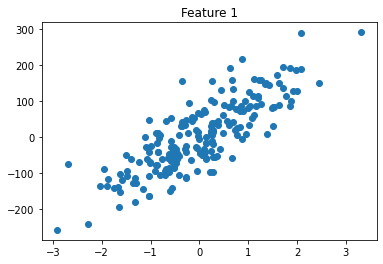

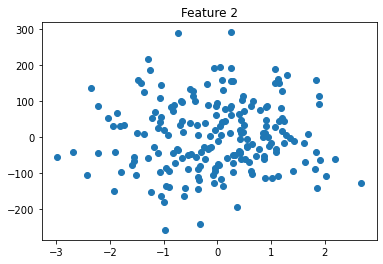

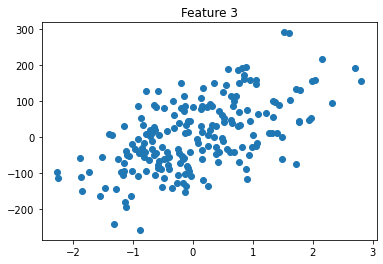

In [30]:

plt.scatter(df['feature1'],df['target'])
plt.title('Feature 1')
plt.show()
plt.scatter(df['feature2'],df['target'])
plt.title('Feature 2')
plt.show()
plt.scatter(df['feature3'],df['target'])
plt.title('Feature 3')
plt.show()



# 2. No Multicollinearity

# df.iloc[:,0:3].corr()

<AxesSubplot:>

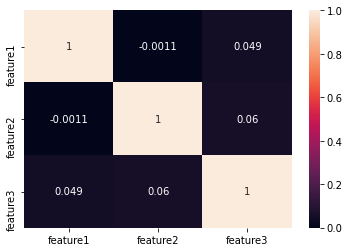

In [37]:
sns.heatmap(df.iloc[:,0:3].corr(),annot = True)

In [51]:
x_train.shape[1]

3

In [44]:
pip install statsmodels

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
variance_inflation_factor(x_train.values, 0)

1.0103257033229724

In [58]:
vif = []

for i in range(x_train.shape[1]):
    vif.append(variance_inflation_factor(x_train.values, i))


In [61]:
pd.DataFrame({'vif':vif},index = df.columns[0:3])

,vif
feature1,1.010326
feature2,1.009871
feature3,1.013950


# if below value of VIF for each columns is greater then and eual to 5 then we can say multicollinearity

In [62]:
pd.DataFrame({'vif':vif},index = df.columns[0:3]).T

,feature1,feature2,feature3
vif,1.010326,1.009871,1.01395


# 3 Normal Residual

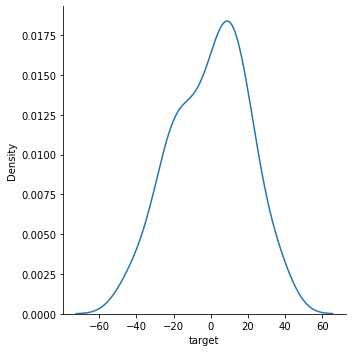

In [65]:
sns.displot(residual,kind = 'kde')
# residual is nothing but it is error and when we plot then it showing almost normal distributed

# 4 Homoscedasticity

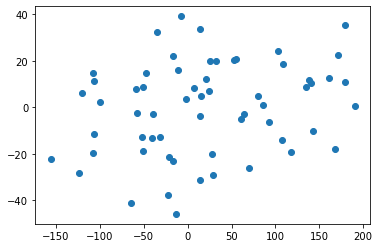

In [66]:
plt.scatter(y_pred,residual)

# it shows spred of data partail uniform with X axis

# 5 Autocorrelation of Residuals

In [69]:
residual

58     32.308068
40      0.469044
34    -31.328091
102    22.081161
184   -19.482249
198    14.538118
95    -13.061868
4      -6.400560
29     39.202565
168   -29.290449
171     4.752482
18    -19.575694
11     -3.006519
89    -10.392463
110   -21.258880
118    11.557545
159     8.624475
35    -18.070497
136    -4.940765
59     35.614240
51     20.123998
16     12.273934
44    -26.318601
94    -45.953275
31      3.377609
162   -11.495436
38     10.971807
28      6.303389
193   -12.763183
27      8.718835
47    -14.223529
165    15.871494
194     8.465019
177    20.245673
176   -20.197709
97     14.876704
174    -3.579682
73     24.320424
69    -18.932354
172     4.893949
108    22.493346
107   -37.729243
189   -28.401771
14    -41.041903
56     11.185857
19      2.093656
114   -12.963090
39     18.615671
185   -22.478711
124    12.422030
98     -2.292401
123     7.673697
119    20.010544
53      7.098087
33      0.779413
179    33.592062
181   -23.140018
106    20.907780
199    -2.7446

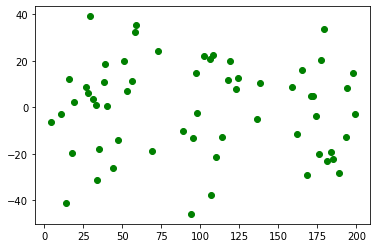

In [73]:
plt.plot(residual,'go')

#So we clearly say that this pattern of spread does not contain any pattern